In [33]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, precision_recall_curve, auc

In [9]:
df = pd.read_csv("/content/data_file.csv")
df.head()

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1


In [10]:
cols_to_drop = ['FileName', 'md5Hash']
df = df.drop(columns=cols_to_drop)
df.drop_duplicates(keep='last', inplace=True)
df.to_csv("df_clear.csv")
df.head()

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
1,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
3,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1
5,34404,84,319776,10,10,374944,9208,312608,14,10,7,262144,16736,2072,0,1
7,34404,84,197888,10,10,229024,112,187208,14,10,7,262144,16736,1328,0,1


In [11]:
df = pd.read_csv("df_clear.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32256 entries, 0 to 32255
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Unnamed: 0          32256 non-null  int64
 1   Machine             32256 non-null  int64
 2   DebugSize           32256 non-null  int64
 3   DebugRVA            32256 non-null  int64
 4   MajorImageVersion   32256 non-null  int64
 5   MajorOSVersion      32256 non-null  int64
 6   ExportRVA           32256 non-null  int64
 7   ExportSize          32256 non-null  int64
 8   IatVRA              32256 non-null  int64
 9   MajorLinkerVersion  32256 non-null  int64
 10  MinorLinkerVersion  32256 non-null  int64
 11  NumberOfSections    32256 non-null  int64
 12  SizeOfStackReserve  32256 non-null  int64
 13  DllCharacteristics  32256 non-null  int64
 14  ResourceSize        32256 non-null  int64
 15  BitcoinAddresses    32256 non-null  int64
 16  Benign              32256 non-null  int6

In [12]:
df.describe()

,Unnamed: 0,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
count,32256.000000,32256.000000,3.225600e+04,3.225600e+04,32256.000000,32256.000000,3.225600e+04,3.225600e+04,3.225600e+04,32256.000000,32256.000000,32256.000000,3.225600e+04,32256.000000,3.225600e+04,32256.000000,32256.000000
mean,24902.563926,12066.045821,5.010986e+04,2.772252e+05,107.990699,6.328001,5.876068e+05,4.972441e+05,2.331863e+05,11.820375,6.202443,5.112320,7.376678e+05,12542.519934,3.058308e+05,0.026321,0.668806
std,18188.653817,16218.442445,8.993091e+06,2.588090e+06,1490.777366,3.103225,2.062327e+07,3.162471e+07,1.493572e+06,10.396151,13.711775,2.140804,7.380421e+05,15261.746421,2.410704e+07,0.160090,0.470650
min,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,9357.750000,332.000000,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000e+00,0.000000e+00,4.096000e+03,8.000000,0.000000,4.000000,2.621440e+05,0.000000,1.072000e+03,0.000000,0.000000
50%,20915.500000,332.000000,2.800000e+01,5.448000e+03,6.000000,6.000000,8.240000e+03,7.300000e+01,1.228800e+04,9.000000,0.000000,5.000000,1.048576e+06,1024.000000,2.072000e+03,0.000000,1.000000
75%,38291.500000,34404.000000,8.400000e+01,6.519600e+04,10.000000,10.000000,1.309800e+05,1.820000e+02,1.024000e+05,14.000000,10.000000,6.000000,1.048576e+06,32768.000000,2.679375e+04,0.000000,1.000000
max,62484.000000,43620.000000,1.615155e+09,2.852127e+08,63325.000000,260.000000,2.147484e+09,2.415919e+09,6.615450e+07,255.000000,255.000000,33.000000,1.677722e+07,58632.000000,4.294942e+09,1.000000,1.000000


In [13]:
X = df.iloc[:, 1:-1].values
Y = df.iloc[:, -1].values

In [15]:
X,Y

(array([[ 34404,     84, 121728, ...,  16864,   1024,      0],
        [ 34404,     84,  19904, ...,  16736,   1040,      0],
        [ 34404,     84,  97728, ...,  16736,   1096,      0],
        ...,
        [   332,      0,      0, ...,      0,   2364,      0],
        [   332,      0,      0, ...,      0, 130296,      0],
        [   332,      0,      0, ...,      0,   6912,      0]]),
 array([1, 1, 1, ..., 0, 0, 0]))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [17]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [20]:
history = model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=20, batch_size=32, validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test), callbacks=[early_stopping])

Epoch 1/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.8565 - loss: 0.2943 - val_accuracy: 0.9639 - val_loss: 0.0989
Epoch 2/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9628 - loss: 0.1070 - val_accuracy: 0.9721 - val_loss: 0.0852
Epoch 3/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9687 - loss: 0.0878 - val_accuracy: 0.9733 - val_loss: 0.0795
Epoch 4/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9729 - loss: 0.0812 - val_accuracy: 0.9781 - val_loss: 0.0732
Epoch 5/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9746 - loss: 0.0764 - val_accuracy: 0.9633 - val_loss: 0.0953
Epoch 6/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9764 - loss: 0.0708 - val_accuracy: 0.9752 - val_loss: 0.0647
Epoch 7/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9765 - loss: 0.0671 - val_accuracy: 0.9803 - val_loss: 0.0609
Epoch 8/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9796 - loss: 0.0595 - 

In [21]:
accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test, verbose=0)[1]
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


In [22]:
y_pred = (model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1)) > 0.5).astype("int32")

202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [23]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2068   73]
 [  49 4262]]


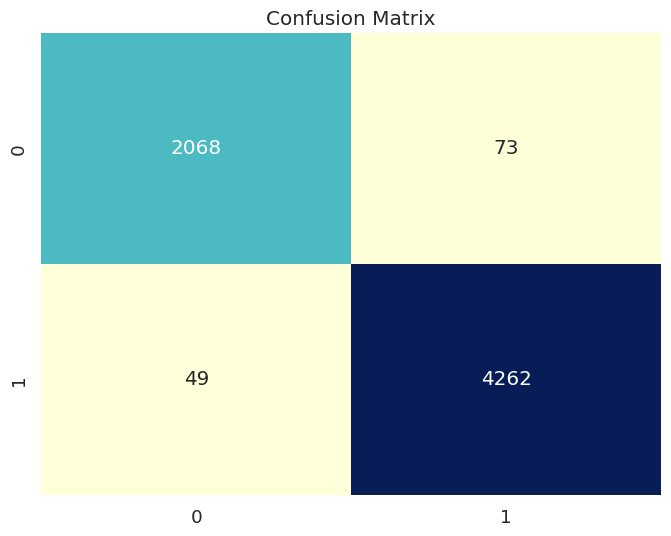

In [36]:
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title('Confusion Matrix')
plt.show()

In [25]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2141
           1       0.98      0.99      0.99      4311

    accuracy                           0.98      6452
   macro avg       0.98      0.98      0.98      6452
weighted avg       0.98      0.98      0.98      6452



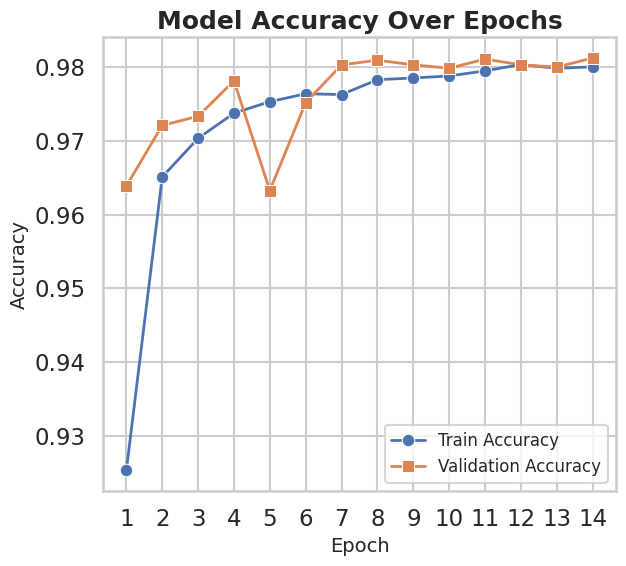

In [52]:
sns.set_theme(style="whitegrid", context="talk", palette="deep")
epochs = range(1, len(history.history['accuracy']) + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.figure(figsize=(12, 6))
ax = plt.subplot(1, 2, 1)
sns.lineplot(x=epochs, y=train_acc, label='Train Accuracy', linewidth=2, marker='o')
sns.lineplot(x=epochs, y=val_acc, label='Validation Accuracy', linewidth=2, marker='s')
ax.set_title('Model Accuracy Over Epochs', fontsize=18, fontweight='bold')
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.legend(loc='lower right', fontsize=12)
ax.set_xticks(epochs)
plt.tight_layout()
plt.show()

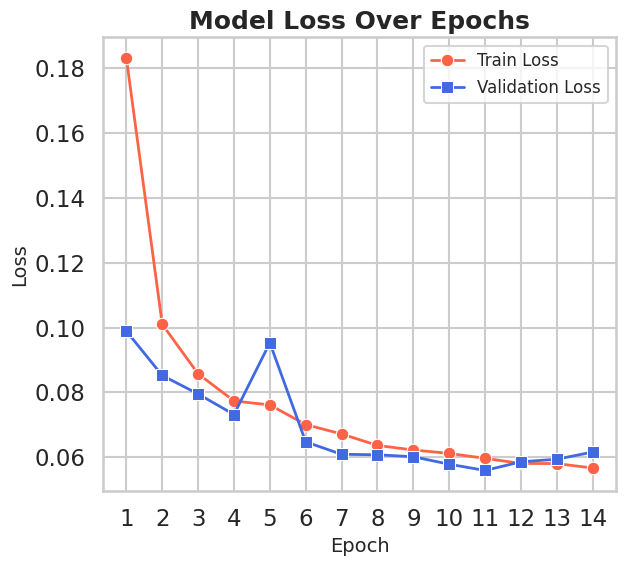

In [53]:
sns.set_theme(style="whitegrid", context="talk", palette="muted")
epochs = range(1, len(history.history['loss']) + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(12, 6))
ax = plt.subplot(1, 2, 2)
sns.lineplot(x=epochs, y=train_loss, label='Train Loss', linewidth=2, marker='o', color='tomato')
sns.lineplot(x=epochs, y=val_loss, label='Validation Loss', linewidth=2, marker='s', color='royalblue')
ax.set_title('Model Loss Over Epochs', fontsize=18, fontweight='bold')
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Loss', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ax.set_xticks(epochs)
plt.tight_layout()
plt.show()

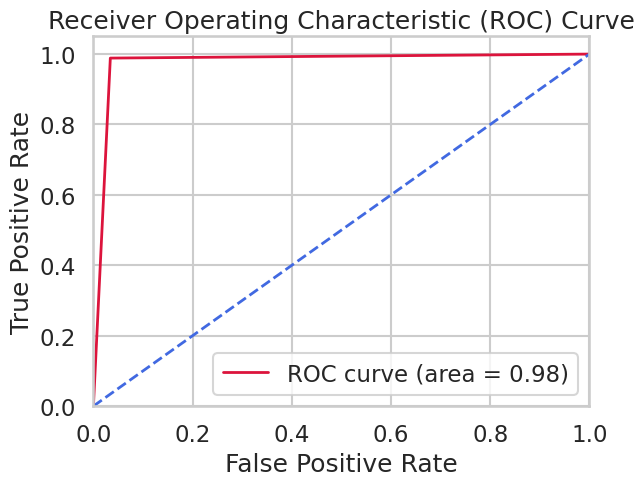

In [59]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='crimson', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='royalblue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

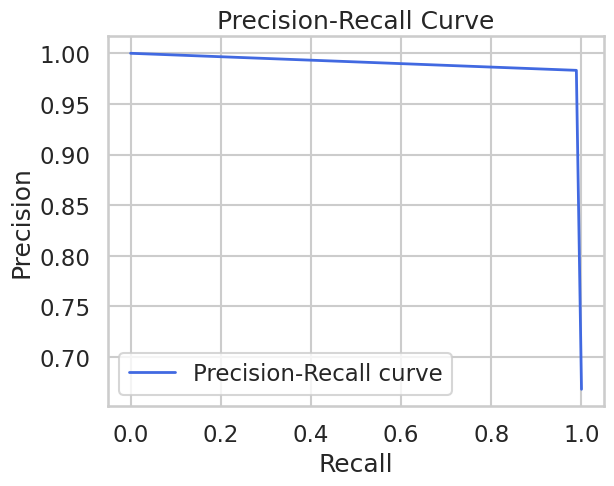

In [61]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure()
plt.plot(recall, precision, color='royalblue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [32]:
print("Enter the features for a test case:")
test_case = []
feature_names = df.columns[1:-1]
for feature_name in feature_names:
    value = float(input(f"Enter the value for {feature_name}: "))
    test_case.append(value)
test_case = np.array(test_case).reshape(1, -1, 1)
predicted_prob = model.predict(test_case)[0][0]
predicted_label = "Benign" if predicted_prob > 0.5 else "Malicious"
print("\nTest Case:")
print(test_case)
print("Predicted Probability:", predicted_prob)
print("Predicted Label:", predicted_label)

Enter the features for a test case:
Enter the value for Machine: 34404
Enter the value for DebugSize: 84
Enter the value for DebugRVA: 37824
Enter the value for MajorImageVersion: 10
Enter the value for MajorOSVersion: 10
Enter the value for ExportRVA: 0
Enter the value for ExportSize: 0
Enter the value for IatVRA: 31648
Enter the value for MajorLinkerVersion: 14
Enter the value for MinorLinkerVersion: 10
Enter the value for NumberOfSections: 6
Enter the value for SizeOfStackReserve: 524288
Enter the value for DllCharacteristics: 49504
Enter the value for ResourceSize: 61320
Enter the value for BitcoinAddresses: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step

Test Case:
[[[3.44040e+04]
  [8.40000e+01]
  [3.78240e+04]
  [1.00000e+01]
  [1.00000e+01]
  [0.00000e+00]
  [0.00000e+00]
  [3.16480e+04]
  [1.40000e+01]
  [1.00000e+01]
  [6.00000e+00]
  [5.24288e+05]
  [4.95040e+04]
  [6.13200e+04]
  [0.00000e+00]]]
Predicted Probability: 0.9996788
Predicted Label: Benign
